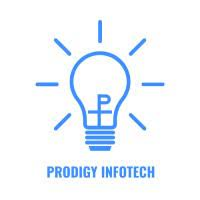

# Data Science Internship

# - Anisha Walde

# Task 3: Building a Decision Tree Classifier for Customer Purchase Prediction.

**Objective:** To create a decision tree classifier that can predict whether a customer will purchase a product or service based on their demographic and behavioral data using the UCI Machine Learning Repository's Bank dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data.shape

(11162, 17)

In [6]:
data.size

189754

In [7]:
data.index

RangeIndex(start=0, stop=11162, step=1)

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
# Define the feature columns and target column
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'deposit'

In [12]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [13]:
# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
7968,57,950,9,1272,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1456,34,925,13,709,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
361,41,75,1,479,9,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
812,46,4414,18,504,7,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1092,28,4465,28,769,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5191,28,159,16,449,2,33,4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5390,35,1144,20,197,13,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,51,746,25,372,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
5527,65,744,5,182,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4541,38,1627,16,1323,9,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1964,35,4963,14,456,1,300,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5007,47,8229,8,784,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8928,35,1473,12,84,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,30,495,21,641,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10702,44,12,19,126,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10466,44,1945,14,191,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8809,55,505,17,58,1,316,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
y_train

7968     no
1456    yes
361     yes
812     yes
1092    yes
       ... 
5734     no
5191    yes
5390     no
860     yes
7270     no
Name: deposit, Length: 7813, dtype: object

In [17]:
y_test

5527      no
4541     yes
1964     yes
5007     yes
8928      no
        ... 
1052     yes
10702     no
10466     no
8809      no
99       yes
Name: deposit, Length: 3349, dtype: object

In [18]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make Predictions

In [20]:
y_pred = clf.predict(X_test)

# Evaluate the model

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78501045088086


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1398  344]
 [ 376 1231]]


In [23]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.79      0.80      0.80      1742
         yes       0.78      0.77      0.77      1607

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.79      0.78      3349



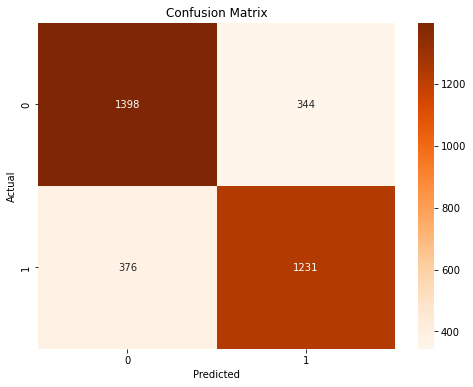

In [24]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the tree structure

In [25]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- duration <= 251.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 123.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |--- job_student <= 0.50
|   |   |   |   |   |   |   |--- day <= 1.50
|   |   |   |   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |--- age >  36.50
|   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- day >  1.50
|   |   |   |   |   |   |   |   |--- duration <= 88.50
|   |   |   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   | 

**Thank you!**